**PREDICTIVE MODELING OF TIME SERIES REGRESSION AND CLUSTER SEGMENTATION IN MACHINE LEARNING**

Author: Anisa Nurhajiza


**LIBRARY**

---




In [ ]:
pip install pmdarima

In [ ]:
# Library for data processing
import statsmodels.api as sm
import pandas as pd
import numpy as np

# Library for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library for time series ARIMA modeling
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Library untuk Clustering
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**READ DATASET**

---



In [ ]:
# Load dataset
customer = pd.read_csv('Case Study - Customer.csv',delimiter=';')
product = pd.read_csv('Case Study - Product.csv', delimiter=';')
store = pd.read_csv('Case Study - Store.csv', delimiter=';')
transaction = pd.read_csv('Case Study - Transaction.csv', delimiter=';')

**DATA CLEANING**

---





In [ ]:
# Data Profiling for the customer table
customer

,CustomerID,Age,Gender,Marital Status,"Income,"
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"
...,...,...,...,...,...
442,443,33,1,NaN,"9,28"
443,444,53,0,Married,"15,31"
444,445,51,0,Married,"14,48"
445,446,57,0,Married,"7,81"


In [ ]:
customer.rename(columns={'Income,': 'Income'}, inplace=True)


In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      447 non-null    int64 
 1   Age             447 non-null    int64 
 2   Gender          447 non-null    int64 
 3   Marital Status  444 non-null    object
 4   Income          447 non-null    object
dtypes: int64(3), object(2)
memory usage: 17.6+ KB


In [ ]:
customer.describe()

,CustomerID,Age,Gender
count,447.000000,447.000000,447.000000
mean,224.000000,39.782998,0.458613
std,129.182042,12.848719,0.498842
min,1.000000,0.000000,0.000000
25%,112.500000,30.000000,0.000000
50%,224.000000,39.000000,0.000000
75%,335.500000,50.500000,1.000000
max,447.000000,72.000000,1.000000


In [ ]:
# Data Cleaning for the customer tabel
# Handling missing values in the Marital Status column using mode imputation

mode_value = customer['Marital Status'].mode()[0]
customer['Marital Status']= customer['Marital Status'].fillna(mode_value)
customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [ ]:
customer.isna().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    0
Income            0
dtype: int64

In [ ]:
customer['Income'] = customer['Income'].str.replace(',', '.').astype(float)
customer = customer.astype({'Age': int,
                            'Gender': bool,
                            'Marital Status': 'category',
                            })

In [ ]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447 entries, 0 to 446
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CustomerID      447 non-null    int64   
 1   Age             447 non-null    int64   
 2   Gender          447 non-null    bool    
 3   Marital Status  447 non-null    category
 4   Income          447 non-null    float64 
dtypes: bool(1), category(1), float64(1), int64(2)
memory usage: 11.6 KB


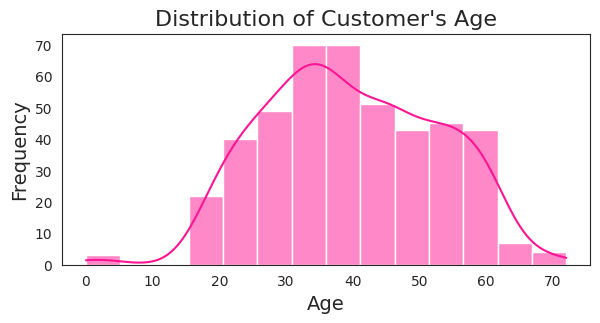

<function matplotlib.pyplot.show(close=None, block=None)>

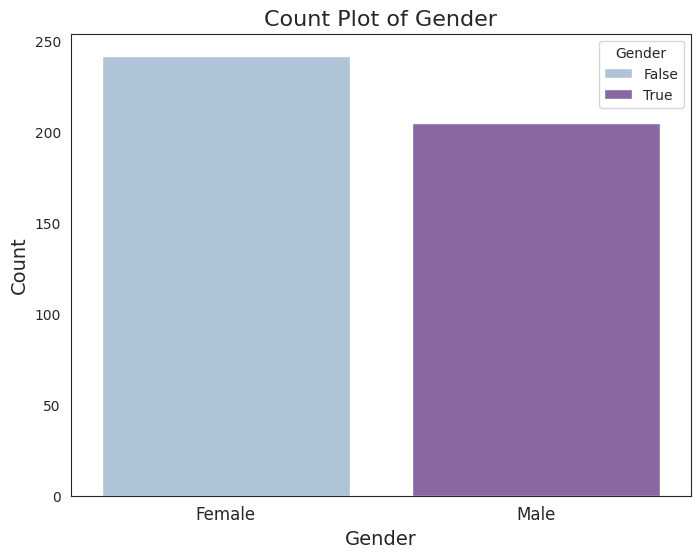

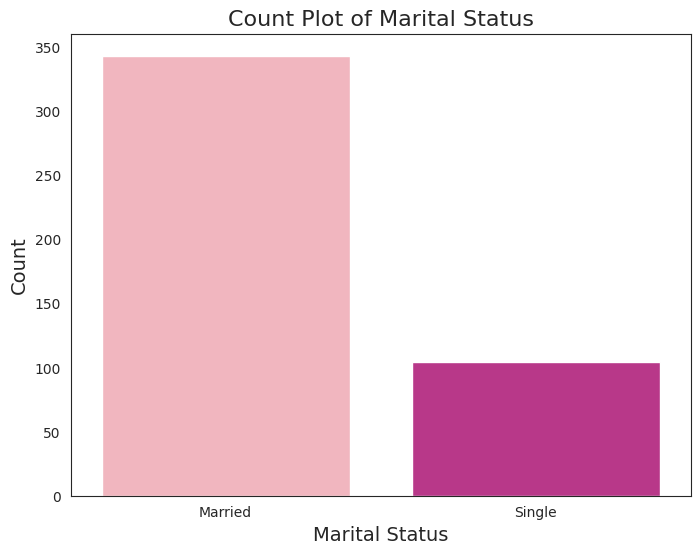

In [ ]:
# Visualization of Age Distribution
plt.figure(figsize=(15,3))

plt.subplot(1,2,1)
sns.histplot(customer['Age'], color='Deeppink', kde=True)
plt.title("Distribution of Customer's Age", fontsize=16)
plt.xlabel('Age', fontsize = 14)
plt.ylabel('Frequency', fontsize = 14)

plt.show()

#  Visualization of Gender Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Gender', data = customer, hue='Gender', palette ='BuPu')
plt.title('Count Plot of Gender', fontsize=16)
plt.xlabel('Gender', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks([0,1], ['Female', 'Male'], fontsize=12)
plt.show

# Visualization of Marital Status Distribution
plt.figure(figsize=(8,6))
sns.countplot(x='Marital Status', data = customer, hue='Marital Status', palette ='RdPu')
plt.title('Count Plot of Marital Status', fontsize=16)
plt.xlabel('Marital Status', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show

In [ ]:
# Data cleaning for the Product table
product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


In [ ]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     10 non-null     object
 1   Product Name  10 non-null     object
 2   Price         10 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 368.0+ bytes


In [ ]:
product.describe()

,Price
count,10.000000
mean,10410.000000
std,4890.455557
min,3200.000000
25%,7825.000000
50%,9700.000000
75%,14250.000000
max,18000.000000


In [ ]:
# Data profiling for the Store table
store

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"
5,6,Lingga,Lingga,Modern Trade,"-5,135399","119,42379"
6,7,Buana Indah,Buana,General Trade,"3,316694","114,590111"
7,8,Sinar Harapan,Harapan Baru,General Trade,"5,54829","95,323753"
8,9,Lingga,Lingga,Modern Trade,"-3,654703","128,190643"
9,10,Harapan Baru,Harapan Baru,General Trade,"3,597031","98,678513"


In [ ]:
# Data cleaning for the Store table
store['Latitude'] = store['Latitude'].str.replace(',', '.')
store['Longitude'] = store['Longitude'].str.replace(',', '.')

In [ ]:
store = store.astype({'GroupStore':'category', 'Type':'category', 'Latitude':'float64', 'Longitude':'float64'})

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   StoreID     14 non-null     int64   
 1   StoreName   14 non-null     object  
 2   GroupStore  14 non-null     category
 3   Type        14 non-null     category
 4   Latitude    14 non-null     float64 
 5   Longitude   14 non-null     float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
store.describe()

,StoreID,Latitude,Longitude
count,14.0000,14.000000,14.000000
mean,7.5000,-2.902409,109.463117
std,4.1833,4.516744,8.654790
min,1.0000,-7.797068,95.323753
25%,4.2500,-6.736148,104.884083
50%,7.5000,-4.395051,108.989384
75%,10.7500,0.082839,114.134794
max,14.0000,5.548290,128.190643


In [ ]:
store.isna().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   StoreID     14 non-null     int64   
 1   StoreName   14 non-null     object  
 2   GroupStore  14 non-null     category
 3   Type        14 non-null     category
 4   Latitude    14 non-null     float64 
 5   Longitude   14 non-null     float64 
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 1.1+ KB


In [ ]:
# Data cleaning for the Transaction table
transaction

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4
...,...,...,...,...,...,...,...,...
5015,TR54423,243,31/12/2022,P10,15000,5,75000,3
5016,TR5604,271,31/12/2022,P2,3200,4,12800,9
5017,TR81224,52,31/12/2022,P7,9400,6,56400,9
5018,TR85016,18,31/12/2022,P8,16000,3,48000,13


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [ ]:
transaction.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [ ]:
transaction.isna().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [ ]:
# Data cleaning for the Transaction Table
transaction = transaction.astype({'Date':'datetime64[ns]'})

<ipython-input-76-5aafd274bcd2>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  transaction = transaction.astype({'Date':'datetime64[ns]'})


In [ ]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


**DATA MERGE**

---



In [ ]:
merged_data = pd.merge(customer, transaction, on='CustomerID')
merged_data = pd.merge(merged_data, product, on='ProductID')
merged_data = pd.merge(merged_data, store, on='StoreID')

merged_data.head()

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,True,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,True,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,False,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,True,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,False,Married,6.80,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,16000,Lingga,Lingga,Modern Trade,-3.654703,128.190643


In [ ]:
df = pd.DataFrame(merged_data)

In [ ]:
# Drop data
merged_data = merged_data.drop(['Price_y'], axis=1)
merged_data = merged_data.rename(columns={'Price_x': 'Price'})

In [ ]:
merged_data

,CustomerID,Age,Gender,Marital Status,Income,TransactionID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,1,55,True,Married,5.12,TR54475,2022-02-23,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
1,5,58,True,Married,3.57,TR53643,2022-05-22,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
2,7,31,False,Married,4.57,TR5151,2022-10-03,P8,16000,2,32000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
3,19,24,True,Single,4.14,TR98635,2022-06-18,P8,16000,1,16000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
4,28,55,False,Married,6.80,TR9420,2022-12-01,P8,16000,3,48000,9,Oat,Lingga,Lingga,Modern Trade,-3.654703,128.190643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,403,30,False,Married,4.60,TR21751,2022-07-10,P9,10000,5,50000,7,Yoghurt,Buana Indah,Buana,General Trade,3.316694,114.590111
5016,410,55,True,Married,8.68,TR86692,2022-05-04,P9,10000,2,20000,7,Yoghurt,Buana Indah,Buana,General Trade,3.316694,114.590111
5017,411,19,True,Single,0.00,TR67993,2022-10-23,P9,10000,2,20000,7,Yoghurt,Buana Indah,Buana,General Trade,3.316694,114.590111
5018,427,54,False,Married,16.88,TR28578,2022-10-30,P9,10000,3,30000,7,Yoghurt,Buana Indah,Buana,General Trade,3.316694,114.590111


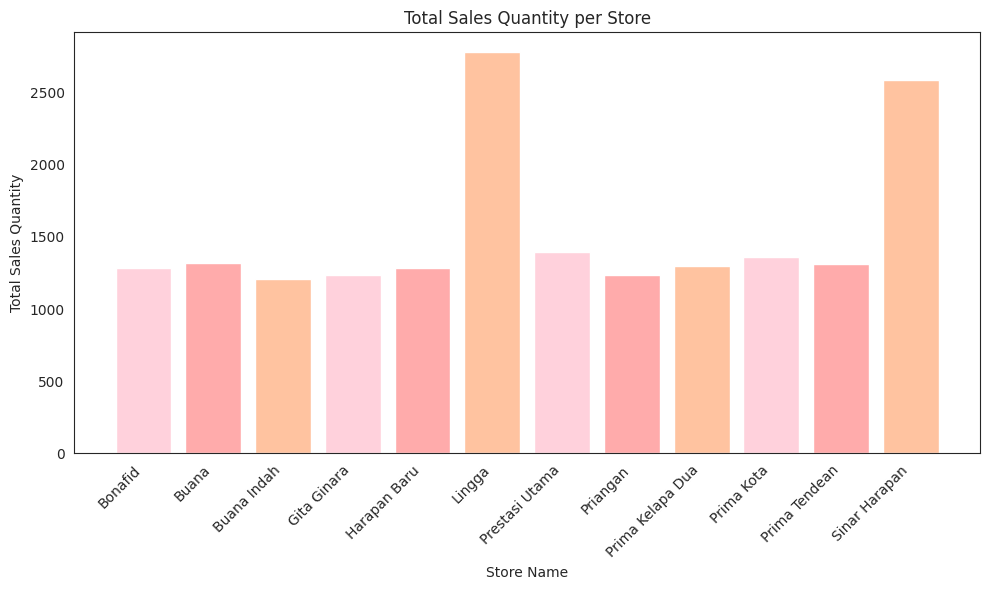

In [ ]:
df = pd.DataFrame(merged_data)

# Calculating the total quantity of sales per store
store_quantity = df.groupby('StoreName')['Qty'].sum().reset_index()

# Creating a bar chart
pastel_colors = ['#FFD1DC', '#FFABAB', '#FFC3A0']
plt.figure(figsize=(10, 6))
plt.bar(store_quantity['StoreName'], store_quantity['Qty'], color=pastel_colors)
plt.xlabel('Store Name')
plt.ylabel('Total Sales Quantity')
plt.title('Total Sales Quantity per Store')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

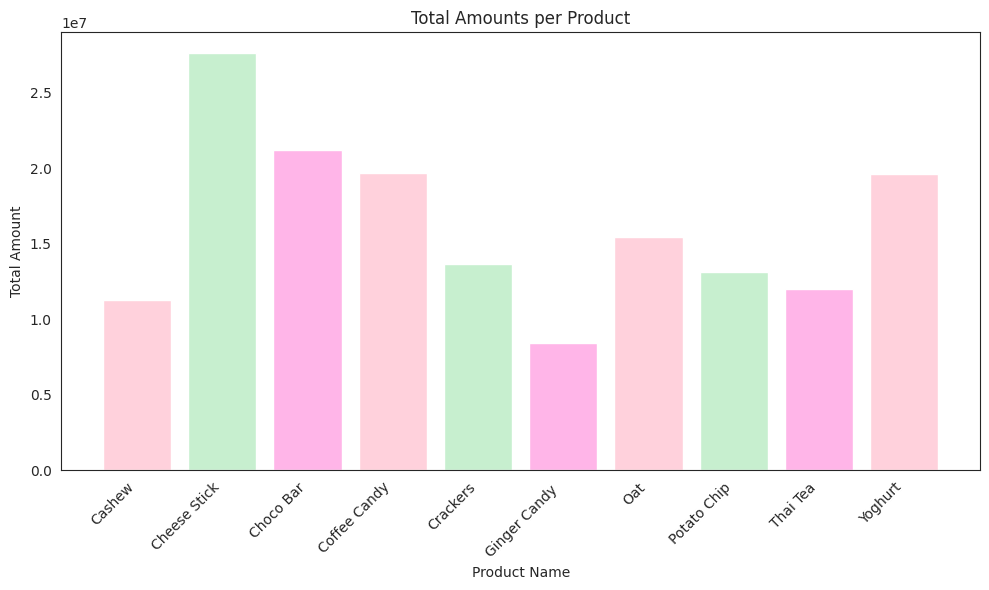

In [ ]:
# Calculating the total sales amount per product
product_amount = df.groupby('Product Name')['TotalAmount'].sum().reset_index()

# Bar Chart of the total sales amount per product
pastel_colors = ['#FFD1DC', '#C7EFCF', '#FFB5E8']
plt.figure(figsize=(10, 6))
plt.bar(product_amount['Product Name'], product_amount['TotalAmount'], color=pastel_colors)
plt.xlabel('Product Name')
plt.ylabel('Total Amount')
plt.title('Total Amounts per Product')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Machine Learning Regression (Time Series)**

In [ ]:
# Performing a groupby based on the 'Date' column and aggregating the 'Qty' column using the SUM function
df = merged_data.groupby(['Date'])['Qty'].sum().reset_index()
print(df)

          Date  Qty
0   2022-01-01   49
1   2022-01-02   50
2   2022-01-03   76
3   2022-01-04   98
4   2022-01-05   67
..         ...  ...
360 2022-12-27   70
361 2022-12-28   68
362 2022-12-29   42
363 2022-12-30   44
364 2022-12-31   37

[365 rows x 2 columns]


In [ ]:
# Splitting into 90% train data and 10% test data
train_size = int(len(df) * 0.9)
df_train = df.iloc[:train_size]
df_test = df.iloc[train_size:]

In [ ]:
# Split to train data and test data
df_train = df_train.set_index('Date')
df_test = df_test.set_index('Date')

y = df_train['Qty']

ARIMAmodel = ARIMA(y, order = (40, 2, 1))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

In [ ]:
y_pred_out

Date
2022-11-25    46.591486
2022-11-26    49.220324
2022-11-27    43.340749
2022-11-28    55.257317
2022-11-29    53.207851
2022-11-30    49.584814
2022-12-01    50.208960
2022-12-02    47.505149
2022-12-03    58.556247
2022-12-04    46.612368
2022-12-05    49.614235
2022-12-06    49.982772
2022-12-07    55.143368
2022-12-08    44.636657
2022-12-09    50.243321
2022-12-10    54.460353
2022-12-11    55.758119
2022-12-12    49.509635
2022-12-13    52.280886
2022-12-14    41.277591
2022-12-15    50.586367
2022-12-16    45.364613
2022-12-17    43.030493
2022-12-18    52.566026
2022-12-19    51.197496
2022-12-20    50.550141
2022-12-21    42.749851
2022-12-22    49.644851
2022-12-23    44.830683
2022-12-24    47.967007
2022-12-25    47.015810
2022-12-26    48.608457
2022-12-27    48.664088
2022-12-28    49.726384
2022-12-29    47.502934
2022-12-30    49.648947
2022-12-31    48.713689
Name: predictions, dtype: float64

In [ ]:
# Evaluate the model
# Mean Absolute Error (MAE)
mae = mean_absolute_error(df_test['Qty'], y_pred_out)
# Mean Squared Error (MSE)
mse = mean_squared_error(df_test['Qty'], y_pred_out)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 12.440122859395961
RMSE: 15.989408875279329


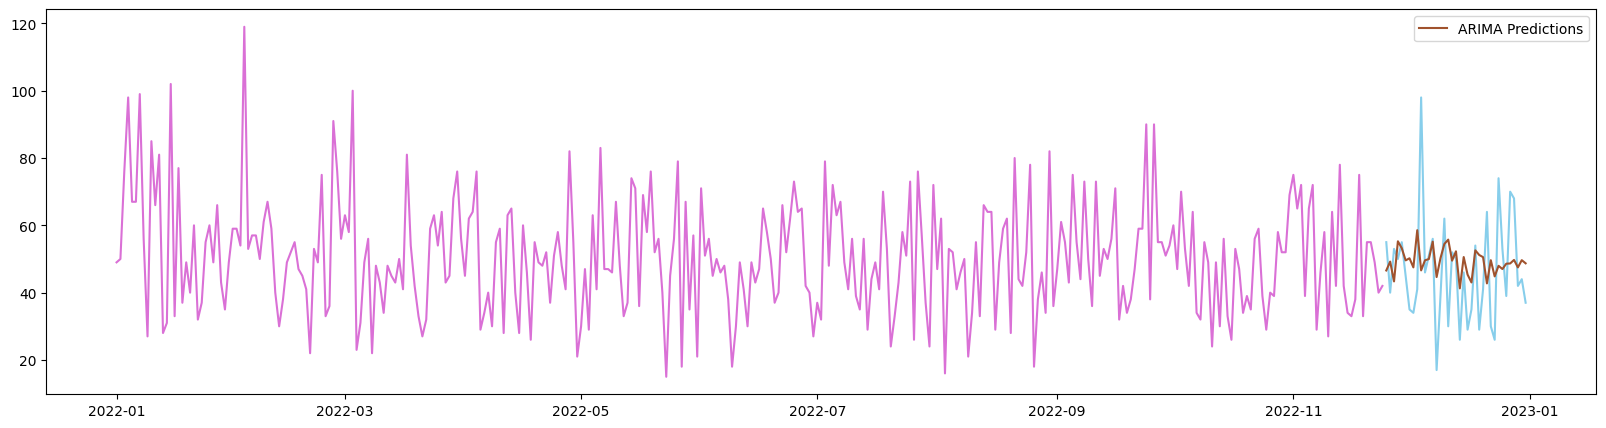

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(df_train['Qty'], color='orchid')
plt.plot(df_test['Qty'], color='skyblue')
plt.plot(y_pred_out, color = 'sienna', label = 'ARIMA Predictions')
plt.legend()

**Machine Learning Clustering**

In [ ]:
df_cluster = merged_data.groupby(['CustomerID']).agg({
    'TransactionID' : 'count',
    'Qty' : 'sum',
    'TotalAmount': 'sum'
}).reset_index()

In [ ]:
df_cluster

,CustomerID,TransactionID,Qty,TotalAmount
0,1,17,60,623300
1,2,13,57,392300
2,3,15,56,446200
3,4,10,46,302500
4,5,7,27,268600
...,...,...,...,...
442,443,16,59,485100
443,444,18,62,577700
444,445,18,68,587200
445,446,11,42,423300


In [ ]:
data_cluster = df_cluster.drop(columns=['CustomerID'])
data_cluster_normalize = preprocessing.normalize(data_cluster)

In [ ]:
data_cluster_normalize

array([[2.72741856e-05, 9.62618317e-05, 9.99999995e-01],
       [3.31379043e-05, 1.45296965e-04, 9.99999989e-01],
       [3.36172117e-05, 1.25504257e-04, 9.99999992e-01],
       ...,
       [3.06539507e-05, 1.15803814e-04, 9.99999993e-01],
       [2.59862980e-05, 9.92204105e-05, 9.99999995e-01],
       [2.95925334e-05, 9.56066465e-05, 9.99999995e-01]])

In [ ]:
K = range(2,8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(data_cluster_normalize)

    fits.append(model)

    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric = 'euclidean'))


<Axes: >

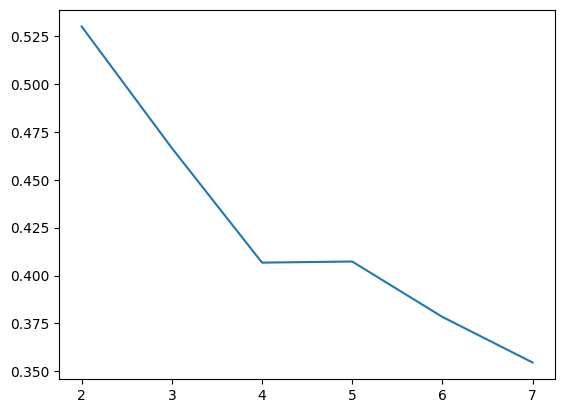

In [ ]:
#choosing 4 cluster
sns.lineplot(x = K, y = score)

**Cluster Final Analysis**

In [ ]:
df_cluster['cluster_label'] = fits[2].labels_

In [ ]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'mean'
})

,CustomerID,TransactionID,Qty,TotalAmount
cluster_label,,,,
0,128,11.601562,40.007812,418542.187500
1,28,9.250000,35.142857,225110.714286
2,156,11.628205,42.775641,383731.410256
3,135,10.829630,40.874074,313365.925926


<function matplotlib.pyplot.show(close=None, block=None)>

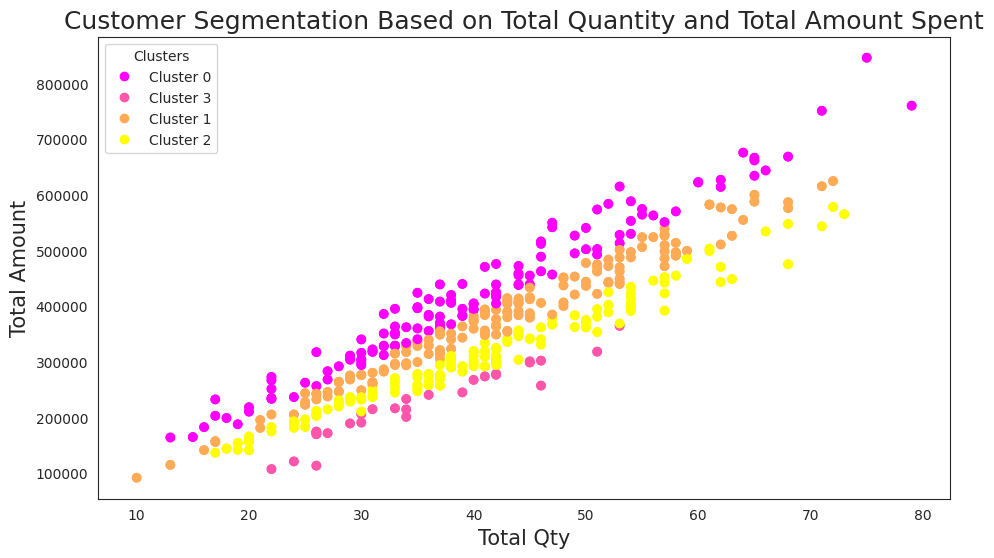

In [ ]:
plt.figure(figsize=(11,6))
sns.set_style('white')
plt.scatter(x=df_cluster['Qty'], y=df_cluster['TotalAmount'], c=df_cluster['cluster_label'], cmap='spring')
scatter = plt.scatter(x=df_cluster['Qty'], y=df_cluster['TotalAmount'], c=df_cluster['cluster_label'], cmap='spring')
plt.xlabel('Total Qty', fontsize=15)
plt.ylabel('Total Amount', fontsize=15)
plt.title('Customer Segmentation Based on Total Quantity and Total Amount Spent', fontsize=18)


cluster_labels = df_cluster['cluster_label'].unique()
legend_labels = [f'Cluster {label}' for label in cluster_labels]

plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels, title='Clusters')


plt.show